In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tempfile import TemporaryFile


In [43]:
data=pd.read_csv('weatherHistory.csv')

In [44]:
data['Formatted Date']=pd.to_datetime(data['Formatted Date'],utc=True)
data['day']=data['Formatted Date'].dt.dayofyear
data['year'] = data['Formatted Date'].dt.year
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,day,year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91,2006
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91,2006
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91,2006


In [45]:
#average air temperature of each day of the year
weather=data.groupby(['day','year'])['Temperature (C)'].mean().reset_index()
weather

,day,year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407
...,...,...,...
4014,365,2015,-4.304861
4015,365,2016,0.117593
4016,366,2008,-6.218056
4017,366,2012,-3.249306


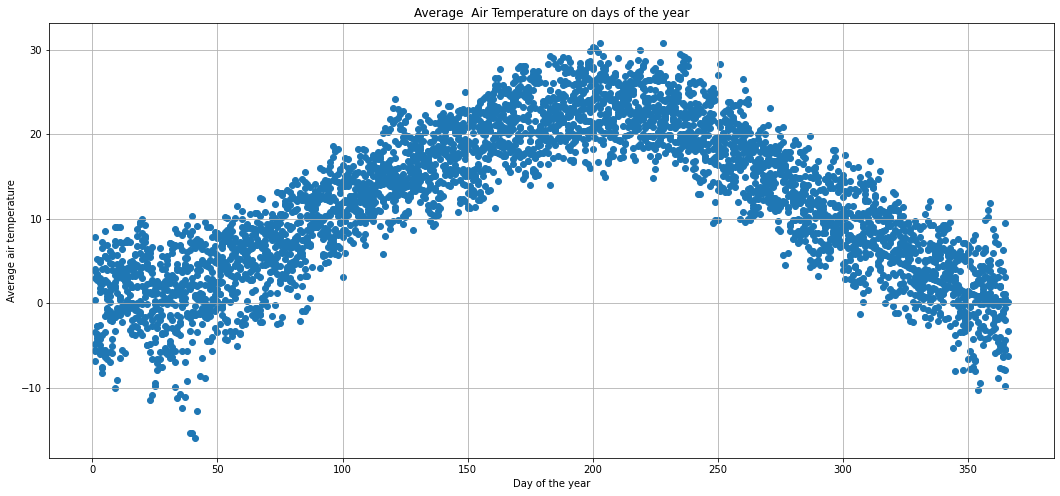

In [46]:
plt.figure(figsize=(18,8))
plt.scatter(weather['day'],weather['Temperature (C)'])
plt.xlabel('Day of the year')
plt.ylabel('Average air temperature')
plt.title('Average  Air Temperature on days of the year')
plt.grid()
plt.show()


In [48]:
X=np.array(weather['day'])
Y=np.array(weather['Temperature (C)'])
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)
print(X.shape)
print(Y.shape)

(4019, 1)
(4019, 1)


In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42)

In [50]:
class Perceptron:
  def __init__(self):
    pass

  def fit(self,X_train,Y_train):
    self.X_train=X_train
    self.Y_train=Y_train
    self.W=np.random.rand(1,1)
    self.b=np.random.rand(1,1)
    lr=0.00001
    epoch=3
    Y=[]
    iteration=[]
    self.errors=[]

    for j in range(self.X_train.shape[0]):
      y_pred=np.matmul(self.X_train[j],self.W)+self.b
      e=self.Y_train[j]-y_pred
      self.W+=lr*self.X_train[j]*e
      self.b+=lr*e
      Y_pred=np.matmul(self.X_train,self.W)+self.b
      error=np.mean(np.abs(self.Y_train-Y_pred))
      self.errors.append(error)
    return self.W,self.b,self.errors

  def evaluate(self,X_train,Y_train):
    Y_pred=np.matmul(X_train,self.W)+self.b
    #MAE Loss
    self.loss=np.mean(np.abs(Y_pred-Y_train))
    return self.loss

  def predict(self,X_train):
    Y_pred=np.matmul(X_train,self.W)+self.b
    return Y_pred

  def loss_func(self):
    X=np.arange(0,len(self.errors))
    Y=self.errors
    plt.plot(X,Y)
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.title('Training curve')
    plt.show()





In [51]:
perceptron=Perceptron()
w,b,e=perceptron.fit(X_train,Y_train)
print("W =",w,"b =",b)




W = [[0.05117566]] b = [[0.18231751]]


In [52]:
#save w,b
with open('bias_weight.npy','wb') as f:
 bias=b
 weight=w
 np.save(f,bias)
 np.save(f,weight)

Loss = 8.299585140835612


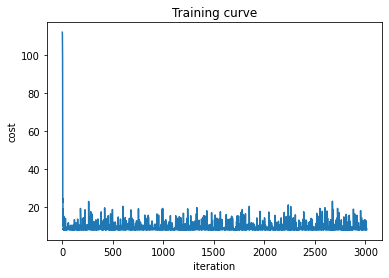

In [53]:
evaluate=perceptron.evaluate(X_train,Y_train)
print("Loss =",evaluate)
perceptron.loss_func()

In [54]:
predict=perceptron.predict(X_test)
predict=np.array(predict)
print('Predicted Temperature on test data:')
print(predict)

Predicted Temperature on test data:
[[10.87803017]
 [ 5.81163996]
 [17.17263619]
 ...
 [12.05507032]
 [ 2.99697873]
 [14.10209667]]
